In [1]:
import lhapdf
#import ROOT
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


4.0


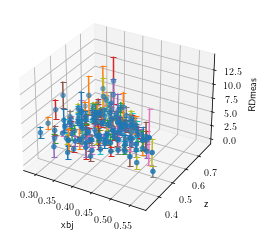

4.75


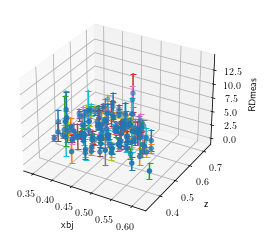

5.5


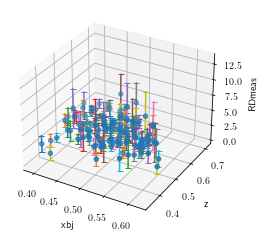

In [2]:
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
    RDxz = json.load(j_RD)
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    #with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
    #    RDxz = json.load(j_RD)

    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
        
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                xs.append(xbj_corr)
                zs.append(z_corr)
                ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    plt.show()
    #plt.savefig("RD_xbj_z_"+str(Q2)+".png")

In [3]:
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]

In [4]:
#inits = (0.31621375387783907,1.0602531294347466,4, 5.68615293e-01,3.55166250e-01,0)

#inits = (0.31621375387783907,1.0602531294347466,2.81081098e-02, 5.68615293e-01,3.55166250e-01)
#inits = (0.31621375387783907,1.0602531294347466,0,0,0)
inits = (0.31621375387783907,1.0602531294347466,0,0)

[ 0.16435968  0.39972734 -0.20880042 -0.69284205]
['$\\chi^2$ / $n_\\mathrm{dof}$ = 267.7 / 185']
      fun: 267.6552824313427
 hess_inv: array([[0.00054536, 0.00132501, 0.00389046, 0.00127934],
       [0.00132501, 0.00390981, 0.01225454, 0.00373352],
       [0.00389046, 0.01225454, 0.05906127, 0.01360642],
       [0.00127934, 0.00373352, 0.01360642, 0.00375962]])
      jac: array([ 0.00535965,  0.01534271,  0.00180817, -0.02267456])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 426
      nit: 40
     njev: 83
   status: 2
  success: False
        x: array([ 0.16435968,  0.39972734, -0.20880042, -0.69284205])


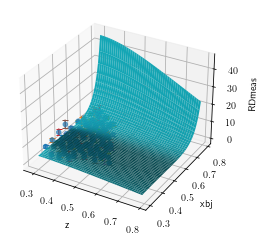

189


In [6]:
from scipy.optimize import minimize
import scipy.special as sc
import scipy.integrate as integrate
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Dz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return (1-delta_z)/(1+delta_z)
    #return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
def CSVx_param(xbj,params):
    #CSVx = params[5]*(1-xbj)**params[2]*xbj**params[4]*(xbj-params[3])
    a = params[3]+1
    b = params[2]+1
    c = sc.beta(a,b+1)/sc.beta(a,b)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
    #return params[len(params)-1]
def Bxz_param(Q,z_had,xbj,i_pdf,i_ff):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    if i_ff==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
        
    elif i_ff==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
    elif i_ff==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_ff==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_ff==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_pdf == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_pdf == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_pdf == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_pdf ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def RDmeas_CSV(Q,z_had,xbj,params,i_pdf,i_ff):
    #delta_z = a+b*z_had
    #delta_z = a+b*z_had/(1+z_had)
    #delta_z = z_had**a*(1-z_had)**b
    #delta_z = z_had**a*(1+z_had)**b
    #delta_z = a
    #Dz = (1-delta_z)/(1+delta_z)
    #Dz = a+b*z_had/(1+z_had)
    Dz = Dz_param(z_had,params)
    CSVx = CSVx_param(xbj,params)
    #Dz = params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
    #CSVx = 2*params[3]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[3]
    #CSVx = params[len(params)-1]
    #CSVx = (1-xbj)**params[4]*xbj**params[5]
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    return (Bx-Ax*CSVx)/Dz-2.5
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []
Q = 0
for key_xbj,xbj_value in RDxz["4.000000"].items():
    Q = 2
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        
        z_hadron = float(key_z)
        
        for key_RunG,RunG_value in z_value.items():
            RD=float(RunG_value["value"])
            RD_error = float(RunG_value["error"])
            RDs.append(float(RunG_value["value"]))
            RDs_error.append(float(RunG_value["error"]))
            xbj_corr = float(RunG_value["xbj_corr"])
            z_corr = float(RunG_value["z_corr"])
            xs.append(xbj_corr)
            zs.append(z_corr)
            ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("z")
ax.set_ylabel("xbj")
ax.set_zlabel("RDmeas")

def least_squares_scipy(params,Q,xs,zs,RD,RD_error):
    least_square = 0
    #Q = math.sqrt(5.5)
    ai = params[0]
    bi = params[1]
    ci = params[2]
    di = params[3]
    for i in range(len(xs)):
        least_square += (RDs[i]-RDmeas_CSV(Q,zs[i],xs[i],params,i_PDF,i_FF)) ** 2 / RD_error[i]**2
    return least_square
#print(len(xs))
#print(len(zs))
#print(len(RDs))
#print(len(RDs_error))

res1 = minimize(least_squares_scipy,x0 = inits,args = (Q,xs,zs,RDs,RDs_error))
#,constraints = cons)
parameters1 = res1.x
print(parameters1)
a_scipy = parameters1[0]
b_scipy = parameters1[1]
c_scipy = parameters1[2]
d_scipy = parameters1[3]

x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,xbj,parameters1,i_PDF,i_FF))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)

fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {res1.fun:.1f} / {len(zs) - len(res1.x)}",
]
print(fit_info)
#for p, v, e in zip(res1.x, res1.x, res1.errors):
#    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
#plt.legend(title="\n".join(fit_info))

print(res1)
plt.show()
print(len(zs))
#,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)



/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_90556/524449868.py:10: RuntimeWarning: overflow encountered in double_scalars
  delta_z = z_had**params[0]*(1-z_had)**params[1]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_90556/524449868.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return (1-delta_z)/(1+delta_z)


[ 3.18183761e-01  8.79473380e-01 -9.83924367e-11 -9.83924545e-11]
['$\\chi^2$ / $n_\\mathrm{dof}$ = 279.1 / 185']
     fun: 279.098437584271
     jac: array([  0.03206253,   0.02952957, -17.27646255,   7.62726593])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 3.18183761e-01,  8.79473380e-01, -9.83924367e-11, -9.83924545e-11])


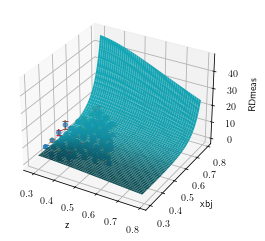

In [7]:

#with constraints
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []
Q = 0
for key_xbj,xbj_value in RDxz["4.000000"].items():
    Q = 2
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        
        z_hadron = float(key_z)
        
        for key_RunG,RunG_value in z_value.items():
            RD=float(RunG_value["value"])
            RD_error = float(RunG_value["error"])
            RDs.append(float(RunG_value["value"]))
            RDs_error.append(float(RunG_value["error"]))
            xbj_corr = float(RunG_value["xbj_corr"])
            z_corr = float(RunG_value["z_corr"])
            xs.append(xbj_corr)
            zs.append(z_corr)
            ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("z")
ax.set_ylabel("xbj")
ax.set_zlabel("RDmeas")

def least_squares_scipy(params,Q,xs,zs,RD,RD_error):
    least_square = 0
    #Q = math.sqrt(5.5)
    ai = params[0]
    bi = params[1]
    ci = params[2]
    di = params[3]
    for i in range(len(xs)):
        least_square += (RDs[i]-RDmeas_CSV(Q,zs[i],xs[i],params,i_PDF,i_FF)) ** 2 / RD_error[i]**2
    return least_square



def CSV_Constr_fun(params):
    integral = integrate.quad( CSVx_param, 0, 1, args=(params))
    return integral
cons = {'type': 'eq','fun': CSV_Constr_fun}
res2 = minimize(least_squares_scipy,x0 = inits,args = (Q,xs,zs,RDs,RDs_error),constraints = cons)
parameters2 = res2.x
print(parameters2)


x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,xbj,parameters2,i_PDF,i_FF))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)

fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {res2.fun:.1f} / {len(zs) - len(res2.x)}",
]
print(fit_info)
print(res2)
#a2 = parameters2[0]
#b2 = parameters2[1]
#c2 = parameters2[2]
#d2 = parameters2[3]
#RDmeas_fit2 = RDmeas_CSV()

4.0
[ 3.18183761e-01  8.79473380e-01 -9.83924367e-11 -9.83924545e-11]

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_90556/524449868.py:10: RuntimeWarning: overflow encountered in double_scalars
  delta_z = z_had**params[0]*(1-z_had)**params[1]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_90556/524449868.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return (1-delta_z)/(1+delta_z)



['$\\chi^2$ / $n_\\mathrm{dof}$ = 279.1 / 185']
     fun: 279.098437584271
     jac: array([  0.03206253,   0.02952957, -17.27646255,   7.62726593])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 3.18183761e-01,  8.79473380e-01, -9.83924367e-11, -9.83924545e-11])
4.75
[ 3.31338728e-01  9.04933577e-01 -6.55954972e-11 -6.55955010e-11]
['$\\chi^2$ / $n_\\mathrm{dof}$ = 236.0 / 169']
     fun: 236.00805416347157
     jac: array([-9.48333740e-03, -3.20434570e-03, -6.83794384e+01,  1.52240791e+01])
 message: 'Optimization terminated successfully'
    nfev: 46
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 3.31338728e-01,  9.04933577e-01, -6.55954972e-11, -6.55955010e-11])
5.5
[ 3.31202070e-01  1.02829014e+00 -3.28187710e-11 -3.28189943e-11]
['$\\chi^2$ / $n_\\mathrm{dof}$ = 214.5 / 136']
     fun: 214.4878609077618
     jac: array([ 8.69750977e-04,  1.13677979e-03, -7.46203079e+01,  1.4

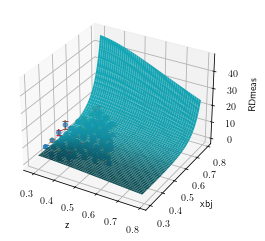

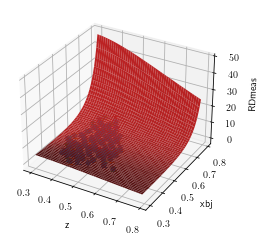

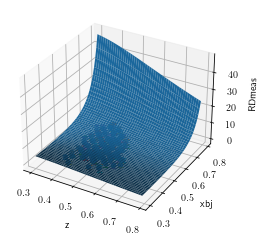

In [8]:
#with constraints
parameters = []
Qs = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
   
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    Qs.append(Q2)
    Q = math.sqrt(Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
    
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
        
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                xs.append(xbj_corr)
                zs.append(z_corr)
                ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("z")
    ax.set_ylabel("xbj")
    ax.set_zlabel("RDmeas")

    def least_squares_scipy(params,Q,xs,zs,RD,RD_error):
        least_square = 0
        
        for i in range(len(xs)):
            least_square += (RDs[i]-RDmeas_CSV(Q,zs[i],xs[i],params,i_PDF,i_FF)) ** 2 / RD_error[i]**2
        return least_square



    def CSV_Constr_fun(params):
        integral = integrate.quad( CSVx_param, 0, 1, args=(params))
        return integral
    cons = {'type': 'eq','fun': CSV_Constr_fun}
    res2 = minimize(least_squares_scipy,x0 = inits,args = (Q,xs,zs,RDs,RDs_error),constraints = cons)
    parameters2 = res2.x
    print(parameters2)
    parameters.append(parameters2)

    x = np.arange(0.3,0.8,0.01)
    y = np.arange(0.3,0.8,0.01)
    #x = np.array(xs)
    #y = np.array(zs)
    fit_RDmeas=[]
    for xbj in x:
        fit_RDmeas_zi = []
        for zi in y:
            #fit_RDmeas_zi.append()
            fit_RDmeas.append(RDmeas_CSV(Q,zi,xbj,parameters2,i_PDF,i_FF))
    X,Y = np.meshgrid(x,y)
    Z = np.reshape(fit_RDmeas,X.shape)
    ax.plot_surface(X,Y,Z)

    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {res2.fun:.1f} / {len(zs) - len(res2.x)}",
    ]
    print(fit_info)
    print(res2)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


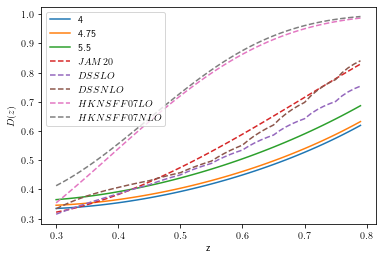

In [9]:
z_had = np.arange(0.3,0.8,0.01)
plt.plot(z_had,Dz_param(z_had,parameters[0]),label = '4')
plt.plot(z_had,Dz_param(z_had,parameters[1]),label = '4.75')
plt.plot(z_had,Dz_param(z_had,parameters[2]),label = '5.5')
#plt.plot(z_had,Dz_param(z_had,parameters_scipy),label = 'scipy')

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.8,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()


This is CSV function delta u_v / delta d_v


Text(0, 0.5, '$\\delta d - \\delta u$')

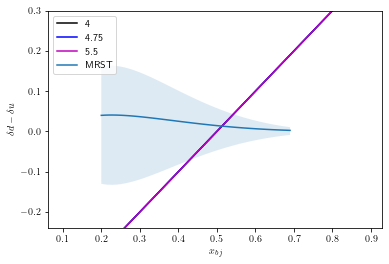

In [12]:
xbj = np.arange(0.1,0.9,0.01)
plt.plot(xbj,CSVx_param(xbj,parameters[0]),label = '4',color = 'k')

#plt.fill_between(xbj,CSVx_param(xbj,parameters[0])-CSVx_param(xbj,param_errs[0]),CSVx_param(xbj,parameters[0])+CSVx_param(xbj,param_errs[0]),color = 'k',alpha = 0.15)
plt.plot(xbj,CSVx_param(xbj,parameters[1]),label = '4.75',color = 'b')
#plt.fill_between(xbj,CSVx_param(xbj,parameters[1])-CSVx_param(xbj,param_errs[1]),CSVx_param(xbj,parameters[1])+CSVx_param(xbj,param_errs[1]),color = 'b',alpha = 0.15)
plt.plot(xbj,CSVx_param(xbj,parameters[2]),label = '5.5',color = 'm')
#plt.fill_between(xbj,CSVx_param(xbj,parameters[2])-CSVx_param(xbj,param_errs[2]),CSVx_param(xbj,parameters[2])+CSVx_param(xbj,param_errs[2]),color = 'm',alpha = 0.15)
#plt.plot(xbj,CSVx_param(xbj,parameters_scipy),label = 'scipy',color = 'g')



print('This is CSV function delta u_v / delta d_v')
def delta_udv(parameter):
    x = np.arange(0.2,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.2,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,alpha = 0.15)
plt.legend()
#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")



In [11]:
print(integrate.quad( CSVx_param, 0, 1, args=(parameters[0])))
print(integrate.quad( CSVx_param, 0, 1, args=(parameters[1])))
print(integrate.quad( CSVx_param, 0, 1, args=(parameters[2])))


(-1.133288333585519e-16, 2.76521001102867e-15)
(1.75817793500588e-18, 2.7652100108122268e-15)
(-6.079608383777544e-17, 2.765210010595918e-15)
